# ✨Bienvenidos✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>

## _Proyecto Final Analitica de Datos..._

- Presentado por: Sandra Marcela Guerrero Calvache, Juan David Delgado, Wilmer Escobar.



## Modelos de Analitica de Datos: Arboles de Decisión

El dataset se compone de 657 registros de 5 cursos de A&G que se dictaron en el año 2019 cohorte II, los cuales pertenecen a cinco programas de la Facultad de Ingeniería de la Universidad del Valle


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#from sklearn import tree

#
# ==============================================================================
import graphviz #libreria de garficos que se une a matplotlib
from io import StringIO #entrada y salida de datos png
from IPython.display import Image  #graficar con colores
from sklearn.tree import export_graphviz #crear graficos de Tree
import pydotplus  #exportar graficos 
import six   # sklearn.externals.six
import sys   # sklearn.externals.six
sys.modules['sklearn.externals.six'] = six # sklearn.externals.six

# Preprocesado y modelado
# ==============================================================================
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve


In [2]:
#Carga los datos provenientes de un csv
datos = pd.read_csv("estudiantes_final.csv", sep=',')

In [3]:
datos

,Error1,Error2,Error3,Accepted,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


In [4]:
datos.columns

Index(['Error1', 'Error2', 'Error3', 'Accepted', 'Parcial1', 'Parcial2',
       'Final', 'Tiempo', 'GanaCurso', 'Entregas'],
      dtype='object')

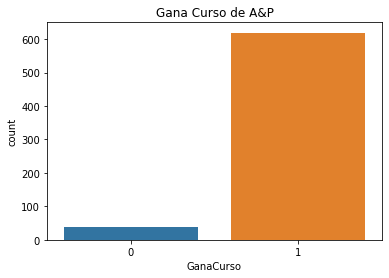

GanaCurso
1    619
0     38
dtype: int64

In [5]:
# Tu código aquí
sns.countplot(x='GanaCurso',data=datos)
plt.title('Gana Curso de A&P')
plt.show()
datos.value_counts(datos['GanaCurso'], sort = True) 

<AxesSubplot:xlabel='Tiempo', ylabel='Density'>

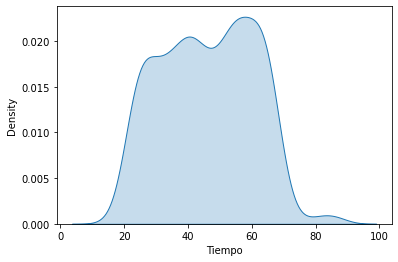

In [6]:
sns.kdeplot(data=datos['Tiempo'], shade=True)

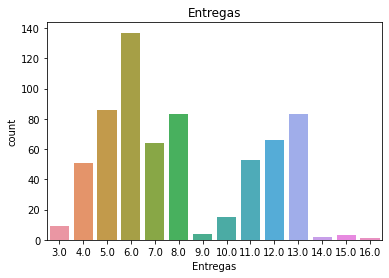

Entregas
6.0     137
5.0      86
8.0      83
13.0     83
12.0     66
7.0      64
11.0     53
4.0      51
10.0     15
3.0       9
9.0       4
15.0      3
14.0      2
16.0      1
dtype: int64

In [7]:
sns.countplot(x='Entregas',data=datos)
plt.title('Entregas')
plt.show()
datos.value_counts(datos['Entregas'], sort = True)

In [8]:
features = ['Parcial1', 'Parcial2', 'Error1', 'Error2', 'Error3', 'Accepted']
X = datos[features] # Features
y = datos['GanaCurso'] # Target variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [10]:
modelo = DecisionTreeClassifier()

# Entrenar el modelo
modelo = modelo.fit(X_train,y_train)

#Predecir para el dataset de testeo 
y_pred = modelo.predict(X_test)

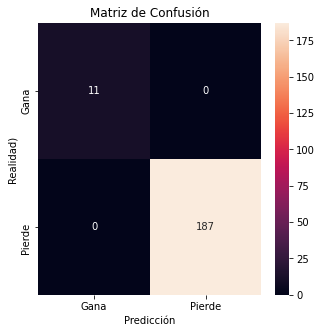

In [11]:
LABELS = ["Gana","Pierde"]
def visualizarResultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Realidad)')
    plt.xlabel('Predicción')
    plt.show()

y_pred = modelo.predict(X_test)
visualizarResultados(y_test, y_pred)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00       187

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [13]:
#Otras medidas
# Accuracy
from sklearn.metrics import accuracy_score
print ( accuracy_score(y_test, y_pred))
# Recall
from sklearn.metrics import recall_score
print (recall_score(y_test, y_pred, average=None))
# Precision
from sklearn.metrics import precision_score
print (precision_score(y_test, y_pred, average=None))

1.0
[1. 1.]
[1. 1.]


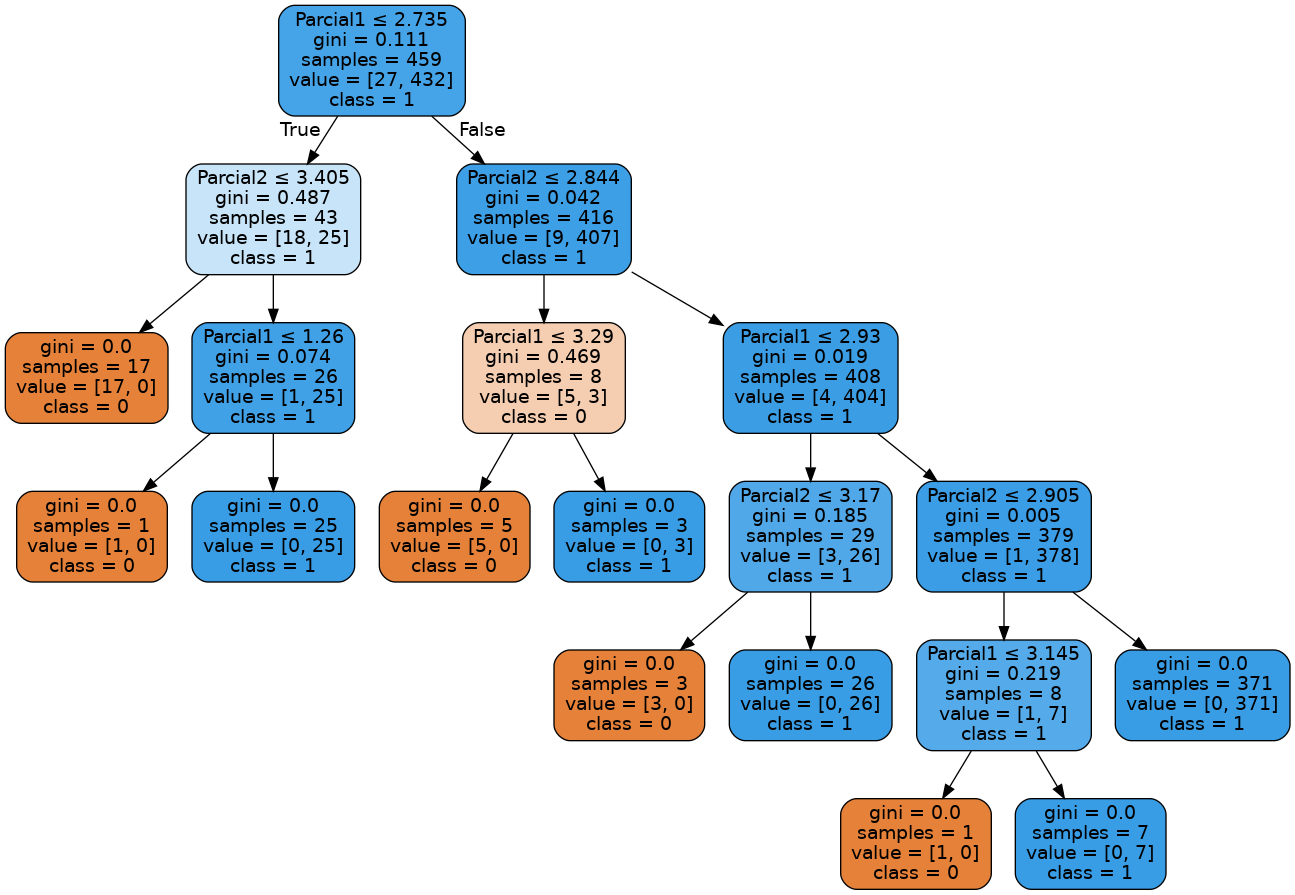

In [14]:
# Graficar el modelo
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('students.png')
Image(graph.create_png())

ROC SCORE:  0.9919786096256684


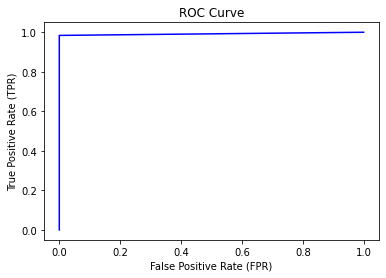

In [15]:
modeloroc = DecisionTreeClassifier() #crear otro objeto del modelo DecisionTreeClassifier
modeloroc.fit(X_train,y_train) #hacer el fit para el nuevo modelo 
pred = modeloroc.predict(X_test) # predecir utiizando el dataset X_test
roc_score = roc_auc_score(y_test,pred) #  clauclar auc con n_samples, n_classes
print("ROC SCORE: ",roc_score)
fpr,tpr,threshold = roc_curve(y_test,pred)
plt.clf()
plt.plot(fpr,tpr, color='Blue', label='No Skill')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()